In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import matplotlib.style as style
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.regularizers import L2
from sklearn.metrics import r2_score,mean_squared_error
import math

In [145]:
data = pd.read_csv('vgsales.csv')

In [146]:
data.head(5)

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [147]:
data.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

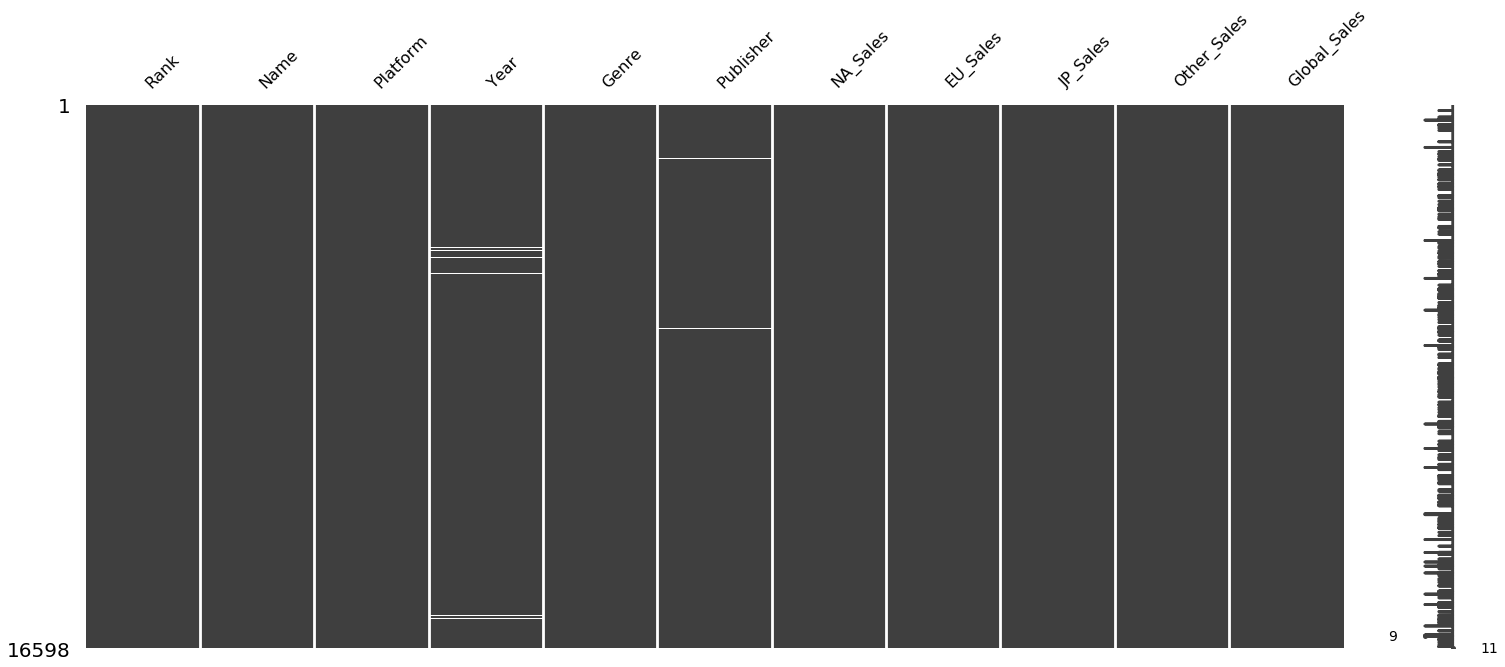

In [148]:
missingno.matrix(data)

In [149]:
data.Publisher.fillna('Unknown', inplace=True)

In [150]:
data.Year.fillna(data.Year.mode()[0], inplace=True)
data.Year=data.Year.astype('int64')

In [151]:
data['Platform'].replace('2600', 'Atari', inplace=True)
display(data.Platform.unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', 'Atari', 'PSP', 'XOne',
       'GC', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

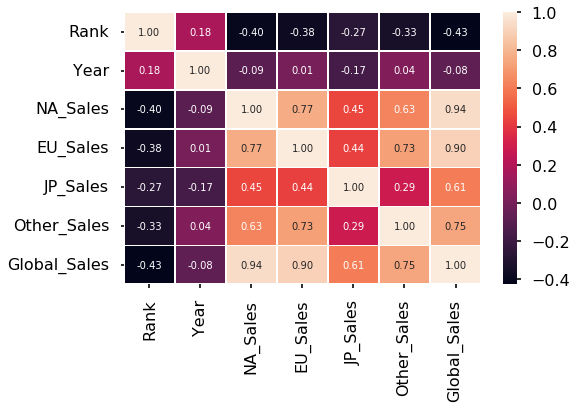

In [152]:
f,ax = plt.subplots(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

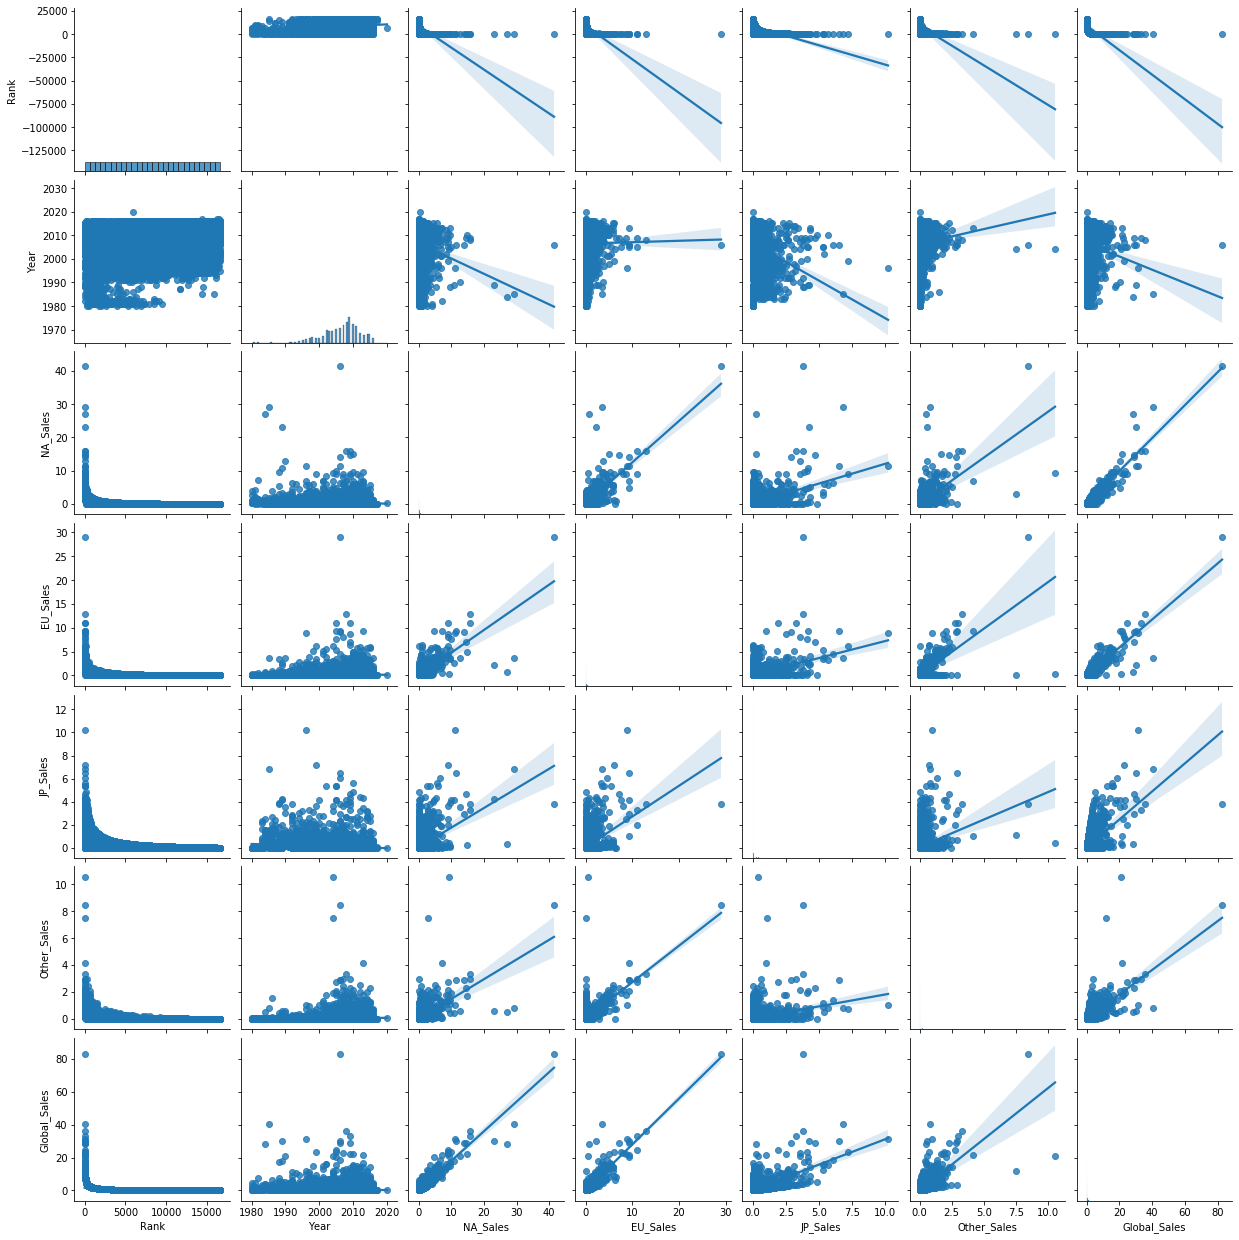

In [22]:
sns.pairplot(data,kind="reg")

In [153]:
df1=data.head(100)

In [25]:
trace1 = go.Scatter(
                    x = df1.Rank,
                    y = df1.NA_Sales,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= data.Name)

trace2 = go.Scatter(
                    x = df1.Rank,
                    y = df1.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= df1.Name)
trace3 = go.Scatter(
                    x = df1.Rank,
                    y = df1.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= data.Name)
trace4 = go.Scatter(
                    x = df1.Rank,
                    y = df1.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'lime',size=8),
                    text= data.Name)
                    

data = [trace1, trace2,trace3,trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

C:\Users\shahy\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\shahy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



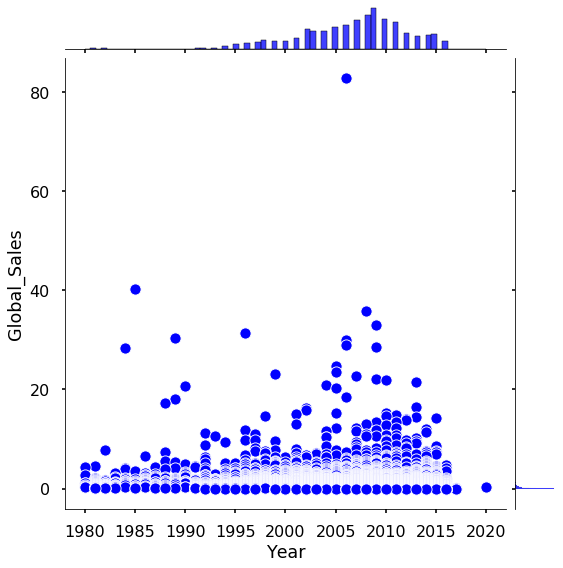

In [154]:
sns.jointplot(data.Year,data.Global_Sales,size=8, ratio=9, color="blue")
plt.show()

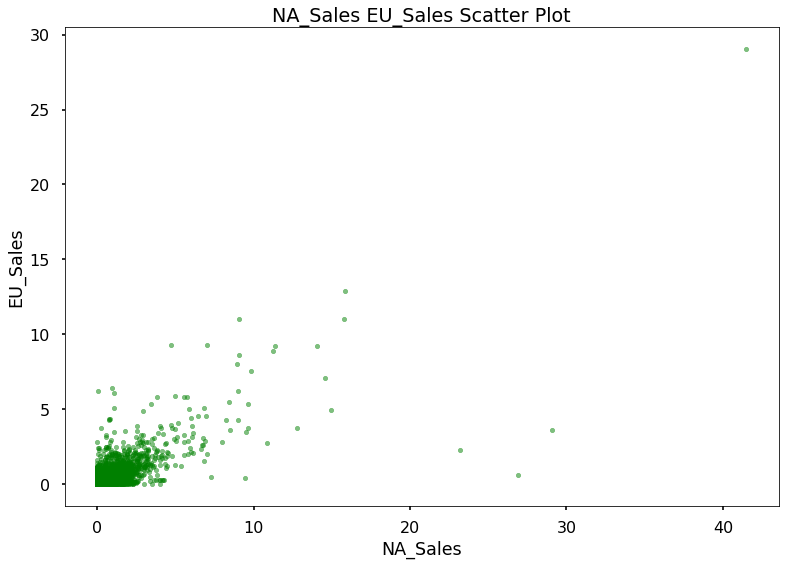

In [100]:
data.plot(kind='scatter', x='NA_Sales', y='EU_Sales',alpha = 0.5,color = 'green')
plt.xlabel('NA_Sales')              # label = name of label
plt.ylabel('EU_Sales')
plt.title('NA_Sales EU_Sales Scatter Plot')            # title = title of plot
plt.show()

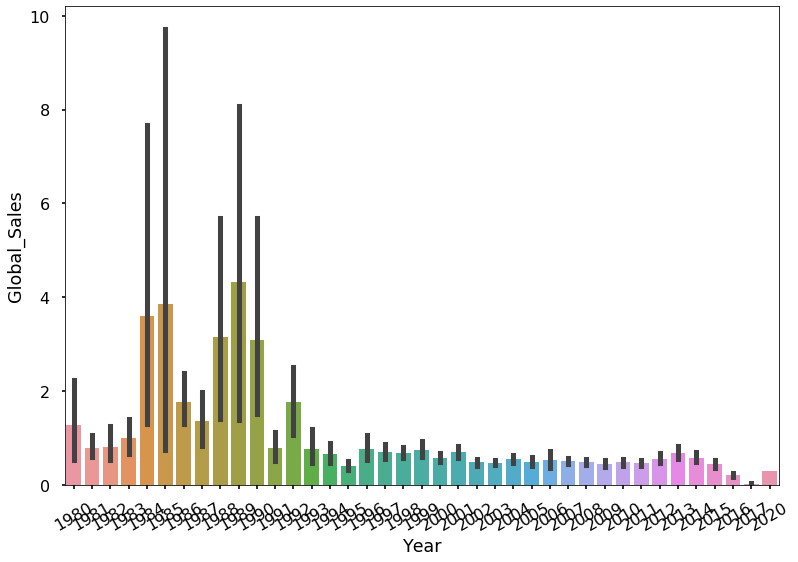

In [155]:
sns.barplot(x="Year",y = 'Global_Sales',data=data);
plt.xticks(rotation=30);

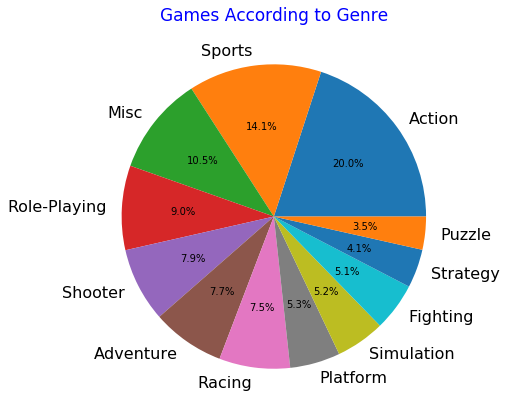

In [156]:
labels=data.Genre.value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0]
sizes = data.Genre.value_counts().values
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Games According to Genre',fontsize = 17,color = 'blue');

C:\Users\shahy\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



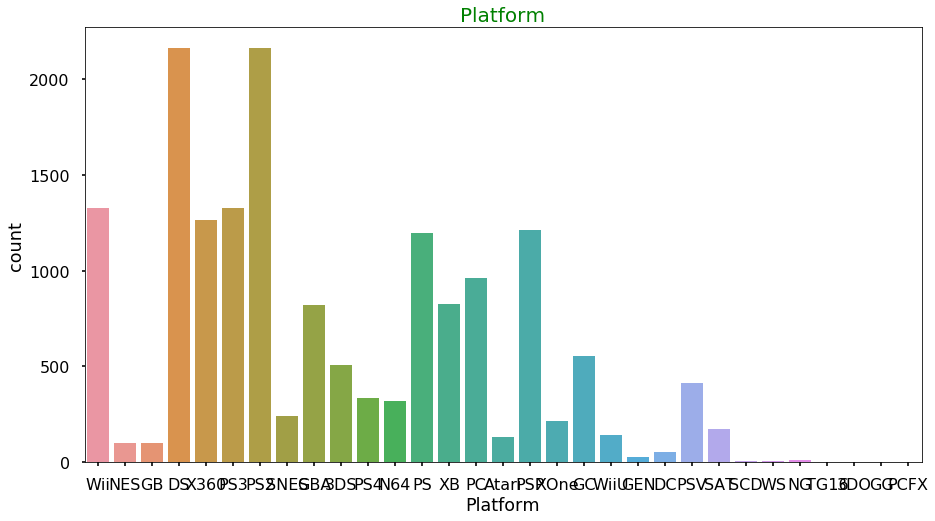

In [157]:
plt.subplots(figsize = (15,8))
sns.countplot(data.Platform)
plt.title("Platform",color = 'green',fontsize=20);

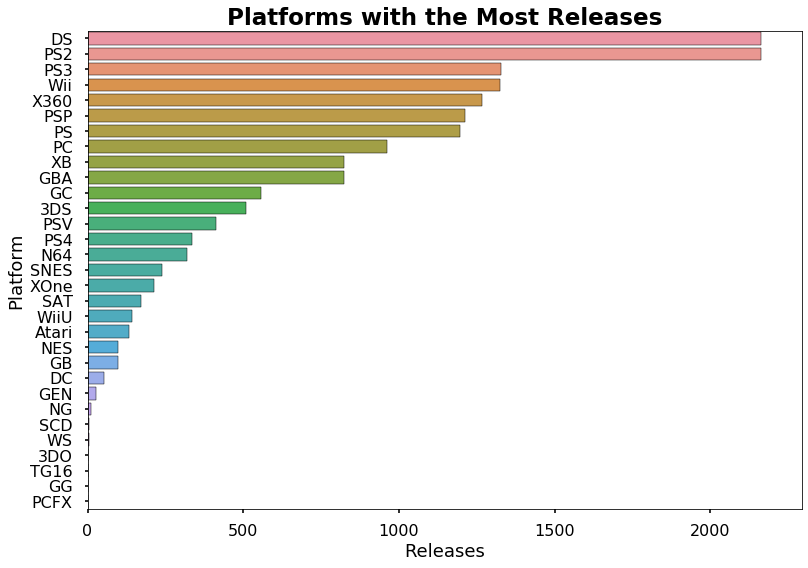

In [158]:
style.use('seaborn-poster')

f, ax = plt.subplots()
platform_releases = data['Platform'].value_counts()

sns.barplot(x=platform_releases.values, y=platform_releases.index, ec='Black')
ax.set_title('Platforms with the Most Releases', fontweight='bold', fontsize=23)
ax.set_xlabel('Releases', fontsize=18)
ax.set_xlim(0, max(platform_releases.values)+130)
ax.set_ylabel('Platform', fontsize=18)
plt.show()

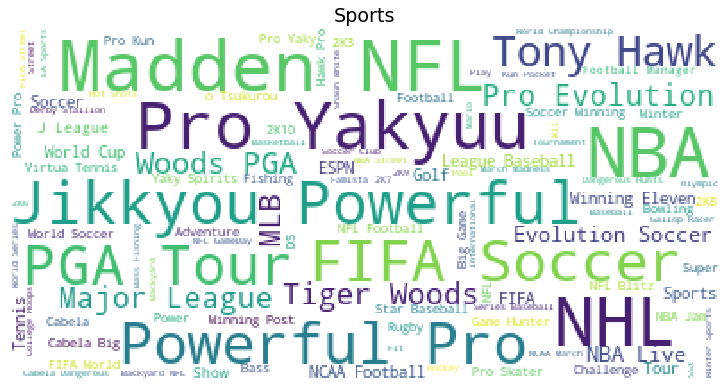

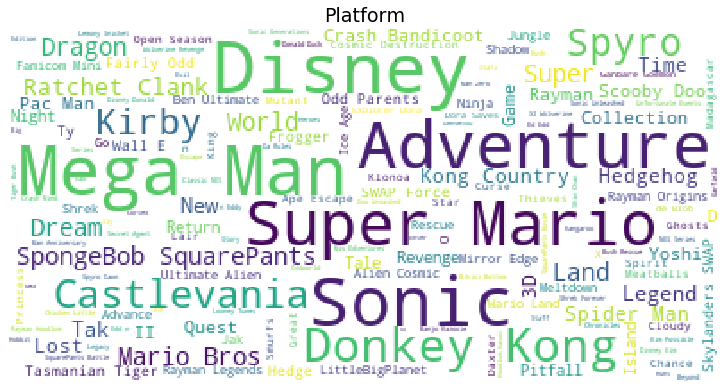

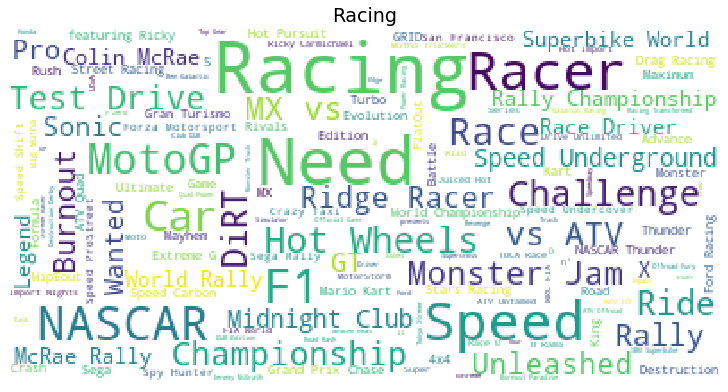

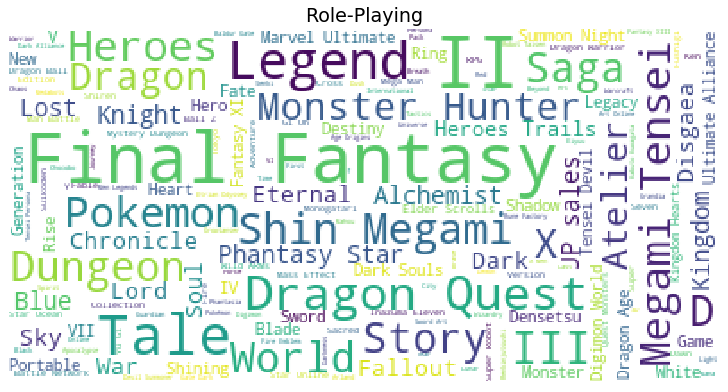

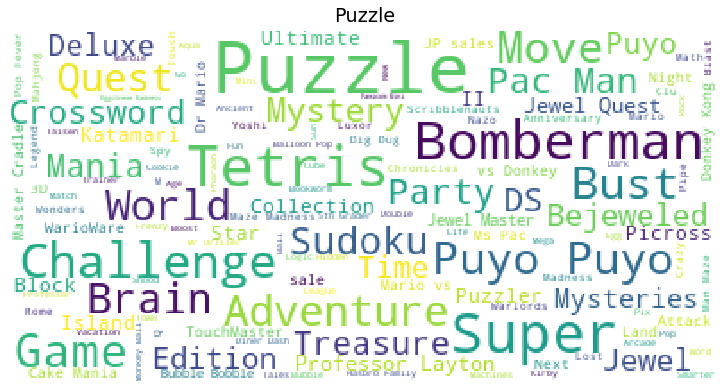

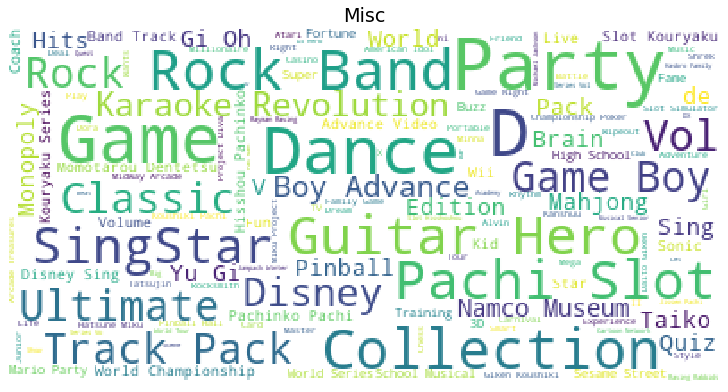

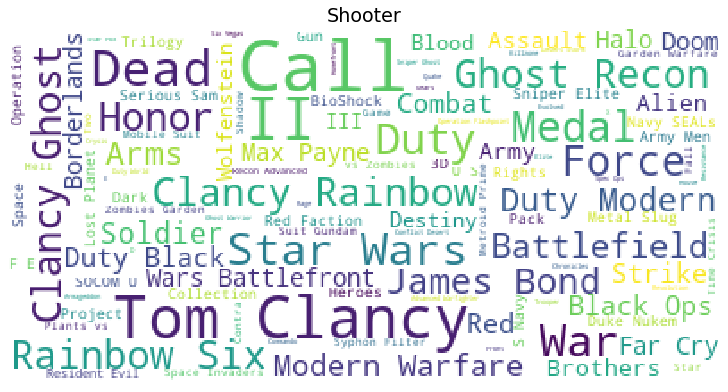

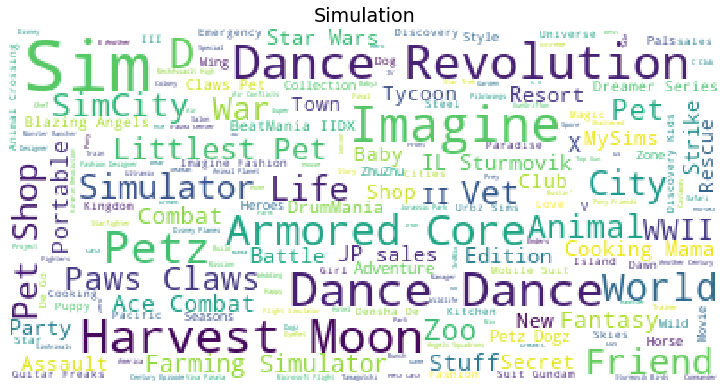

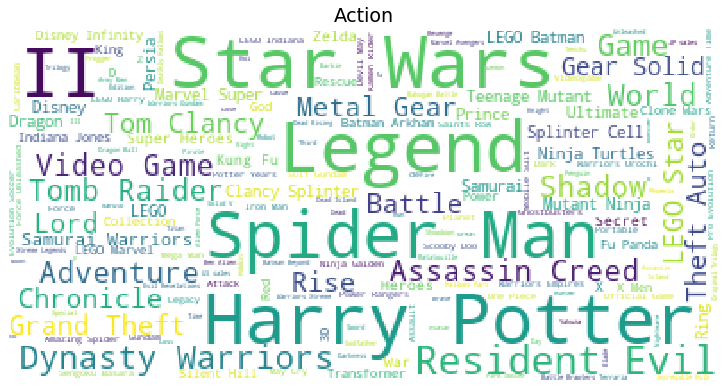

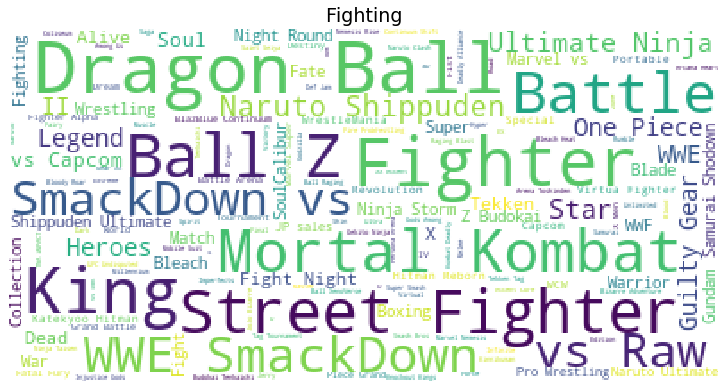

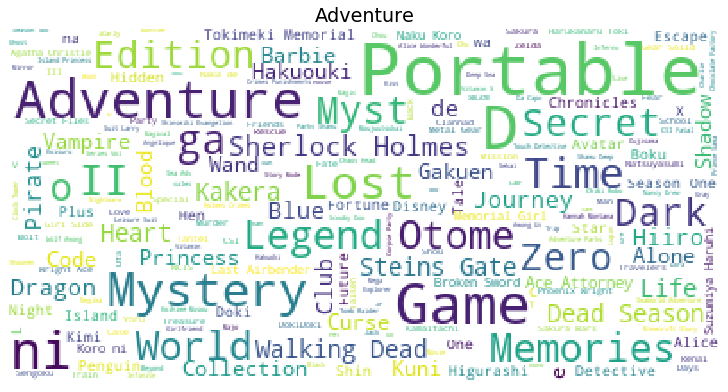

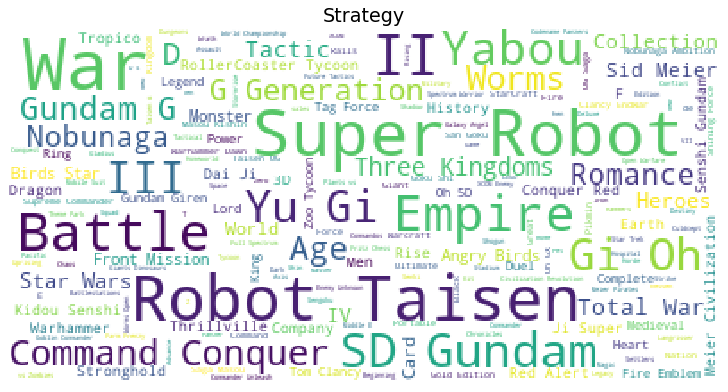

In [159]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

stopwords = set(STOPWORDS)

for x in data.Genre.unique():
    wc = WordCloud(background_color="white", max_words=2000, 
                   stopwords=stopwords, max_font_size=40, random_state=42)
    wc.generate(data.Name[data.Genre == x].to_string())
    plt.imshow(wc)
    plt.title(x)
    plt.axis("off")
    plt.show()

Text(0, 0.5, 'Number of sales')

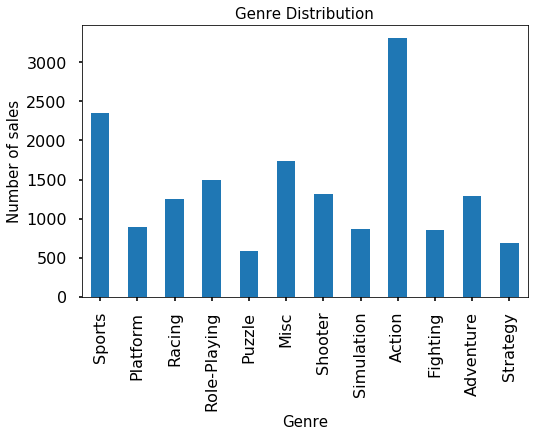

In [160]:
fig,ax = plt.subplots(figsize=(8,5))
data['Genre'].value_counts(sort=False).plot(kind='bar',ax=ax,rot =90)
plt.title('Genre Distribution',fontsize=15)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Number of sales',fontsize=15)

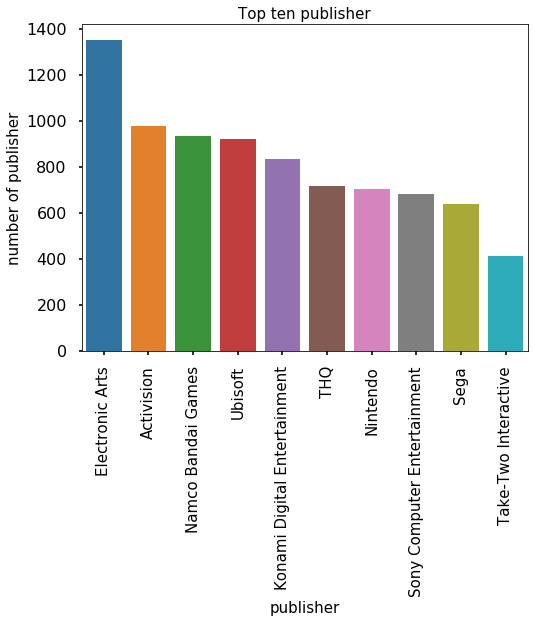

In [161]:
publisher = Counter(data['Publisher'].dropna().tolist()).most_common(10) #ten top publisher
publisher_name = [name[0] for name in publisher]
publisher_count = [name[1] for name in publisher]

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=publisher_name,y=publisher_count,ax=ax)
plt.title('Top ten publisher',fontsize=15)
plt.ylabel('number of publisher',fontsize=15)
plt.xlabel('publisher',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15,rotation=90)

In [162]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
df1 = data.iloc[:100,:]

#import graph objects as "go"
import plotly.graph_objs as go

#creating trace1
trace1 = go.Scatter(
                    x = df1.Rank,
                    y = df1.NA_Sales,
                    mode = "lines",
                    name = "NA Sales",
                    marker = dict(color="rgba(166,11,2,0.8)"),
                    text = df1.Name)
#creating trace2
trace2 = go.Scatter(
                    x = df1.Rank,
                    y = df1.EU_Sales,
                    mode = "lines+markers",
                    name = "EU Sales",
                    marker = dict(color = "rgba(80,12,160,0.5)"),
                    text = data.Name)
data = [trace1,trace2]
layout = dict(title = "Global Sales of Top 100 Games",
                xaxis = dict(title="Rank",ticklen= 5, zeroline=False)
             )
fig = dict(data = data, layout = layout)
py.offline.iplot(fig)

[Scatter({
     'marker': {'color': 'rgba(166,11,2,0.8)'},
     'mode': 'lines',
     'name': 'NA Sales',
     'text': array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii',
                    'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris',
                    'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii',
                    'Duck Hunt', 'Nintendogs', 'Mario Kart DS',
                    'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Wii Fit Plus',
                    'Kinect Adventures!', 'Grand Theft Auto V',
                    'Grand Theft Auto: San Andreas', 'Super Mario World',
                    'Brain Age: Train Your Brain in Minutes a Day',
                    'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land',
                    'Super Mario Bros. 3', 'Grand Theft Auto V',
                    'Grand Theft Auto: Vice City', 'Pokemon Ruby/Pokemon Sapphire',
                    'Pokemon Black/Pokemon White',
                    'Brain Age 2: M

In [163]:
data = pd.read_csv('vgsales.csv')

In [164]:
data.Publisher.fillna('Unknown', inplace=True)
data.Year.fillna(data.Year.mode()[0], inplace=True)
data.Year=data.Year.astype('int64')
data['Platform'].replace('2600', 'Atari', inplace=True)
display(data.Platform.unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', 'Atari', 'PSP', 'XOne',
       'GC', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [165]:
from sklearn.preprocessing import LabelEncoder
# label encoding of categorical variables
lbe = LabelEncoder()
data['Genre'] = lbe.fit_transform(data['Genre'])
data['Platform'] = lbe.fit_transform(data['Platform'])
data['Publisher'] = lbe.fit_transform(data['Publisher'])
data.sample(3)

Rank                                  Name  Platform  Year  Genre  \
4059    4061              One Piece: Grand Battle!        15  2001      2   
2933    2935  Metal Gear Solid V: The Phantom Pain        17  2015      0   
14868  14871                Let's Dance with Mel B        26  2011     10   

       Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
4059          53      0.00      0.00      0.46         0.03          0.49  
2933         275      0.21      0.18      0.22         0.08          0.70  
14868         70      0.00      0.02      0.00         0.00          0.03

In [166]:
data.drop(['Name'],axis = 1, inplace = True)

In [167]:
data_array = np.array(data)
data.head(2)

Rank  Platform  Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     1        26  2006     10        359     41.49     29.02      3.77   
1     2        11  1985      4        359     29.08      3.58      6.81   

   Other_Sales  Global_Sales  
0         8.46         82.74  
1         0.77         40.24

In [168]:
training_sets = []
for rec in data_array:
    rec_arr = []
    x = rec[0:9]  
#     y = [1 if rec[11] >=5 else 0]
    y = [rec[-1]]
    rec_arr.append(x)
    rec_arr.append(y)
    training_sets.append(rec_arr)

In [71]:
data_array

array([[1.0000e+00, 2.6000e+01, 2.0060e+03, ..., 3.7700e+00, 8.4600e+00,
        8.2740e+01],
       [2.0000e+00, 1.1000e+01, 1.9850e+03, ..., 6.8100e+00, 7.7000e-01,
        4.0240e+01],
       [3.0000e+00, 2.6000e+01, 2.0080e+03, ..., 3.7900e+00, 3.3100e+00,
        3.5820e+01],
       ...,
       [1.6598e+04, 1.6000e+01, 2.0080e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e-02],
       [1.6599e+04, 4.0000e+00, 2.0100e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e-02],
       [1.6600e+04, 6.0000e+00, 2.0030e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e-02]])

In [75]:
training_sets[1]

[array([2.000e+00, 1.100e+01, 1.985e+03, 4.000e+00, 3.590e+02, 2.908e+01,
        3.580e+00, 6.810e+00, 7.700e-01]),
 [40.24]]

In [169]:
X = []
y = []
for data in training_sets:
    X.append(data[0])
    y.append(data[1])
    
X = np.asarray(X)
y = np.asarray(y)

In [170]:
model = Sequential([
    tf.keras.layers.InputLayer(input_shape = (6,)),
    Dense(units = 40, activation = 'linear'),
    Dense(units = 1, activation = 'linear')
])

In [171]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                200       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [176]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.5),
    loss=tf.keras.losses.MeanSquaredError()
)

# model.compile(




#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss=tf.keras.losses.BinaryCrossentropy()
# )

In [178]:
history = model.fit(X, y, epochs = 15)


Epoch 1/15
519/519 [==============================] - 1s 1ms/step - loss: 2113.0161
Epoch 2/15
519/519 [==============================] - 0s 875us/step - loss: 0.1056
Epoch 3/15
519/519 [==============================] - 0s 940us/step - loss: 0.0273
Epoch 4/15
519/519 [==============================] - 0s 885us/step - loss: 0.0068
Epoch 5/15
519/519 [==============================] - 0s 926us/step - loss: 0.0020
Epoch 6/15
519/519 [==============================] - 0s 864us/step - loss: 8.1034e-04
Epoch 7/15
519/519 [==============================] - 0s 870us/step - loss: 6.0463e-04
Epoch 8/15
519/519 [==============================] - 0s 848us/step - loss: 15.1700
Epoch 9/15
519/519 [==============================] - 0s 911us/step - loss: 0.0998
Epoch 10/15
519/519 [==============================] - 0s 850us/step - loss: 6.8276
Epoch 11/15
519/519 [==============================] - 0s 848us/step - loss: 4.9973
Epoch 12/15
519/519 [==============================] - 0s 889us/step - loss

In [179]:
predicted = model.predict(X)

In [180]:
predicted

array([[8.2515884e+01],
       [3.9999969e+01],
       [3.5817112e+01],
       ...,
       [8.0776215e-03],
       [1.3493538e-02],
       [6.8073273e-03]], dtype=float32)

In [181]:
errors = 10
for p, a in zip(predicted, y):
#     p_val = 0;
#     if p > 0.5:
#         p_val = 1
#     if p_val != a:
#         errors += 1
    print(f'({p}, {a})')
    if errors <= 0:
        break
    errors -= 1
# errors

([82.515884], [82.74])
([39.99997], [40.24])
([35.817112], [35.82])
([32.94501], [33.])
([31.563118], [31.37])
([30.030014], [30.26])
([30.031643], [30.01])
([28.94167], [29.02])
([28.531776], [28.62])
([27.930225], [28.31])
([24.780952], [24.76])


KeyError: 'val_loss'

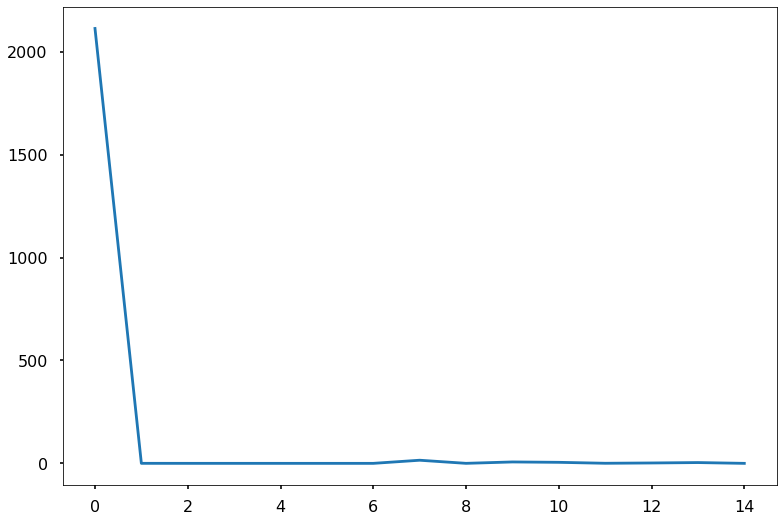

In [182]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

[array([1.660e+04, 6.000e+00, 2.003e+03, 4.000e+00, 5.460e+02, 1.000e-02,
        0.000e+00, 0.000e+00, 0.000e+00]),
 [0.01]]

In [99]:
data.shape


(16598, 11)

In [101]:
data.query()


Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [184]:
r2 = r2_score(y, predicted)

In [185]:
r2

0.9998742592888229

In [187]:
rmse = mean_squared_error(y, predicted)
rmse1 = math.sqrt(rmse)

In [188]:
rmse1

0.01743665073251861

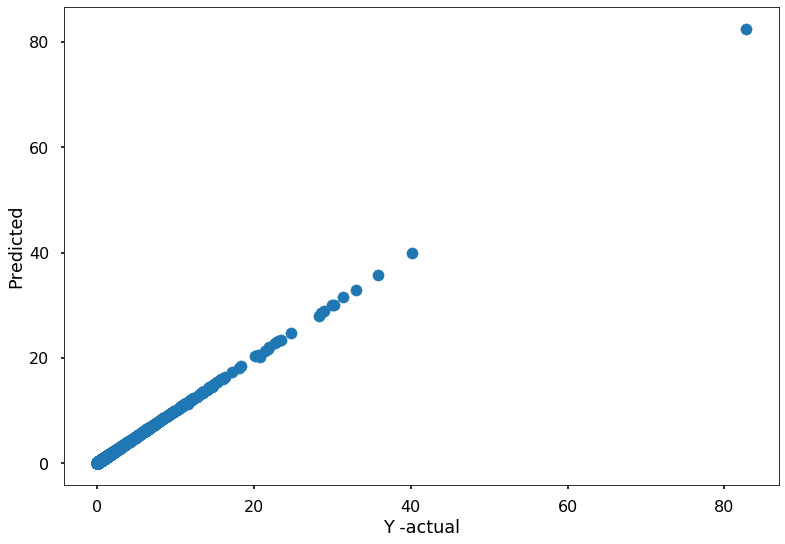

In [195]:
plt.scatter(y,predicted)
plt.xlabel("Y -actual")
plt.ylabel("Predicted")
plt.show()